In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

In [2]:
# Load astronomy data
data = pd.read_csv('../Data/DR3/espectros_normalizadosNP.csv')


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,1.000000,0.963275,0.903244,0.858556,0.853516,0.869289,0.885497,0.875889,0.862596,0.855179,...,0.030628,0.027760,0.023020,0.017343,0.010740,0.003501,0.010620,0.004592,0.000000,2
1,1.000000,0.771788,0.677324,0.593260,0.529016,0.517378,0.542013,0.548153,0.548507,0.572690,...,0.040768,0.040706,0.039856,0.039915,0.041191,0.043393,0.049142,0.056228,0.068138,2
2,0.942982,1.000000,0.994795,0.939529,0.907774,0.907365,0.906004,0.869911,0.841486,0.845002,...,0.015277,0.014148,0.013310,0.013390,0.014468,0.016314,0.019670,0.023328,0.028270,2
3,0.999049,1.000000,0.989950,0.970693,0.954327,0.926094,0.895425,0.874978,0.884339,0.876736,...,0.021012,0.021231,0.020369,0.019049,0.017172,0.014540,0.012097,0.009416,0.007532,2
4,1.000000,0.959666,0.944849,0.850314,0.782926,0.795160,0.811005,0.753086,0.709586,0.752360,...,0.043495,0.043723,0.043515,0.044613,0.047198,0.050640,0.057615,0.065128,0.076822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.000000,0.793286,0.736600,0.642706,0.564153,0.577290,0.629768,0.616867,0.586808,0.631431,...,0.043914,0.043939,0.043193,0.043516,0.045236,0.047997,0.054642,0.062641,0.075786,2
419,0.690252,0.627470,0.624956,0.643108,0.640668,0.604647,0.563618,0.538220,0.538581,0.534361,...,0.017734,0.015113,0.011871,0.008784,0.006130,0.004269,0.003894,0.005141,0.008529,2
420,0.749535,0.907509,1.000000,0.919852,0.774177,0.722561,0.803956,0.865523,0.800265,0.704964,...,0.021203,0.009092,0.034128,0.021466,0.010451,0.003308,0.000000,0.003766,0.013197,2
421,1.000000,0.859806,0.781651,0.768437,0.766682,0.734606,0.697106,0.679657,0.697678,0.728420,...,0.001360,0.000000,0.001476,0.006973,0.016963,0.031134,0.050534,0.071787,0.097027,2


In [4]:
# Preprocess the data by standardizing it
data_standardized = (data - data.mean()) / data.std()

In [5]:
data_standardized

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.994884,1.156228,1.070713,1.088607,1.208226,1.291260,1.303866,1.294747,1.256159,1.156474,...,-0.872759,-0.884410,-0.898083,-0.913450,-0.932255,-0.959202,-0.948111,-0.980352,-1.008515,NaN
1,0.994884,0.584504,0.380707,0.241687,0.127151,0.094258,0.132494,0.171149,0.187867,0.202616,...,-0.836911,-0.839498,-0.840035,-0.837539,-0.833417,-0.832524,-0.832264,-0.829764,-0.822925,NaN
2,0.839035,1.265879,1.350331,1.347100,1.388984,1.420773,1.373799,1.274252,1.184359,1.122110,...,-0.927029,-0.931629,-0.931566,-0.926744,-0.920154,-0.918512,-0.920895,-0.925712,-0.931515,NaN
3,0.992284,1.265879,1.335530,1.446587,1.544076,1.484479,1.337724,1.291622,1.330112,1.229263,...,-0.906756,-0.907057,-0.907225,-0.907714,-0.911379,-0.924146,-0.943671,-0.966285,-0.988001,NaN
4,0.994884,1.145452,1.197785,1.062295,0.973055,1.039117,1.049829,0.873732,0.735737,0.809293,...,-0.827269,-0.829033,-0.827418,-0.821741,-0.813921,-0.809510,-0.806786,-0.803808,-0.799274,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.994884,0.648690,0.561748,0.399535,0.244211,0.298045,0.431762,0.406726,0.318139,0.400962,...,-0.825789,-0.828283,-0.828526,-0.825430,-0.820290,-0.817902,-0.815726,-0.811063,-0.802096,NaN
419,0.148244,0.153613,0.220766,0.400817,0.499121,0.391098,0.206174,0.137095,0.154105,0.073195,...,-0.918343,-0.928282,-0.936528,-0.942235,-0.947216,-0.956761,-0.968338,-0.978752,-0.985284,NaN
420,0.310283,0.989728,1.366227,1.284285,0.943908,0.792174,1.025790,1.259208,1.044157,0.649256,...,-0.906081,-0.949168,-0.859783,-0.899584,-0.933192,-0.959813,-0.980049,-0.982761,-0.972571,NaN
421,0.994884,0.847299,0.699345,0.800914,0.918936,0.833145,0.661401,0.621993,0.695235,0.728457,...,-0.976231,-0.980710,-0.972370,-0.948326,-0.912057,-0.871452,-0.828080,-0.784389,-0.744241,NaN


In [6]:
data_standardized.shape

(423, 344)

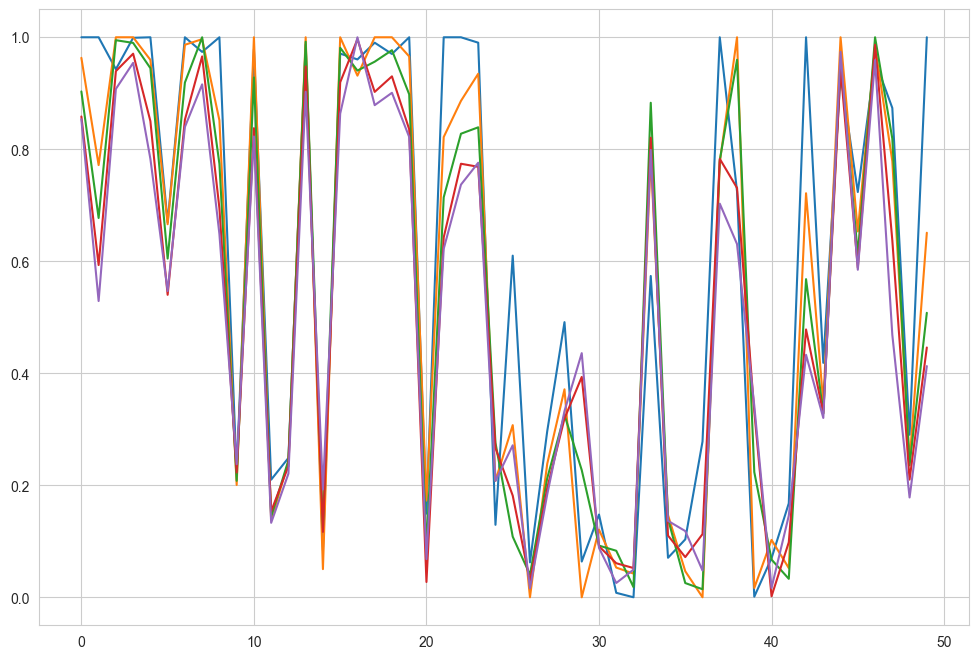

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data.iloc[0:50, 0:5])
plt.show()

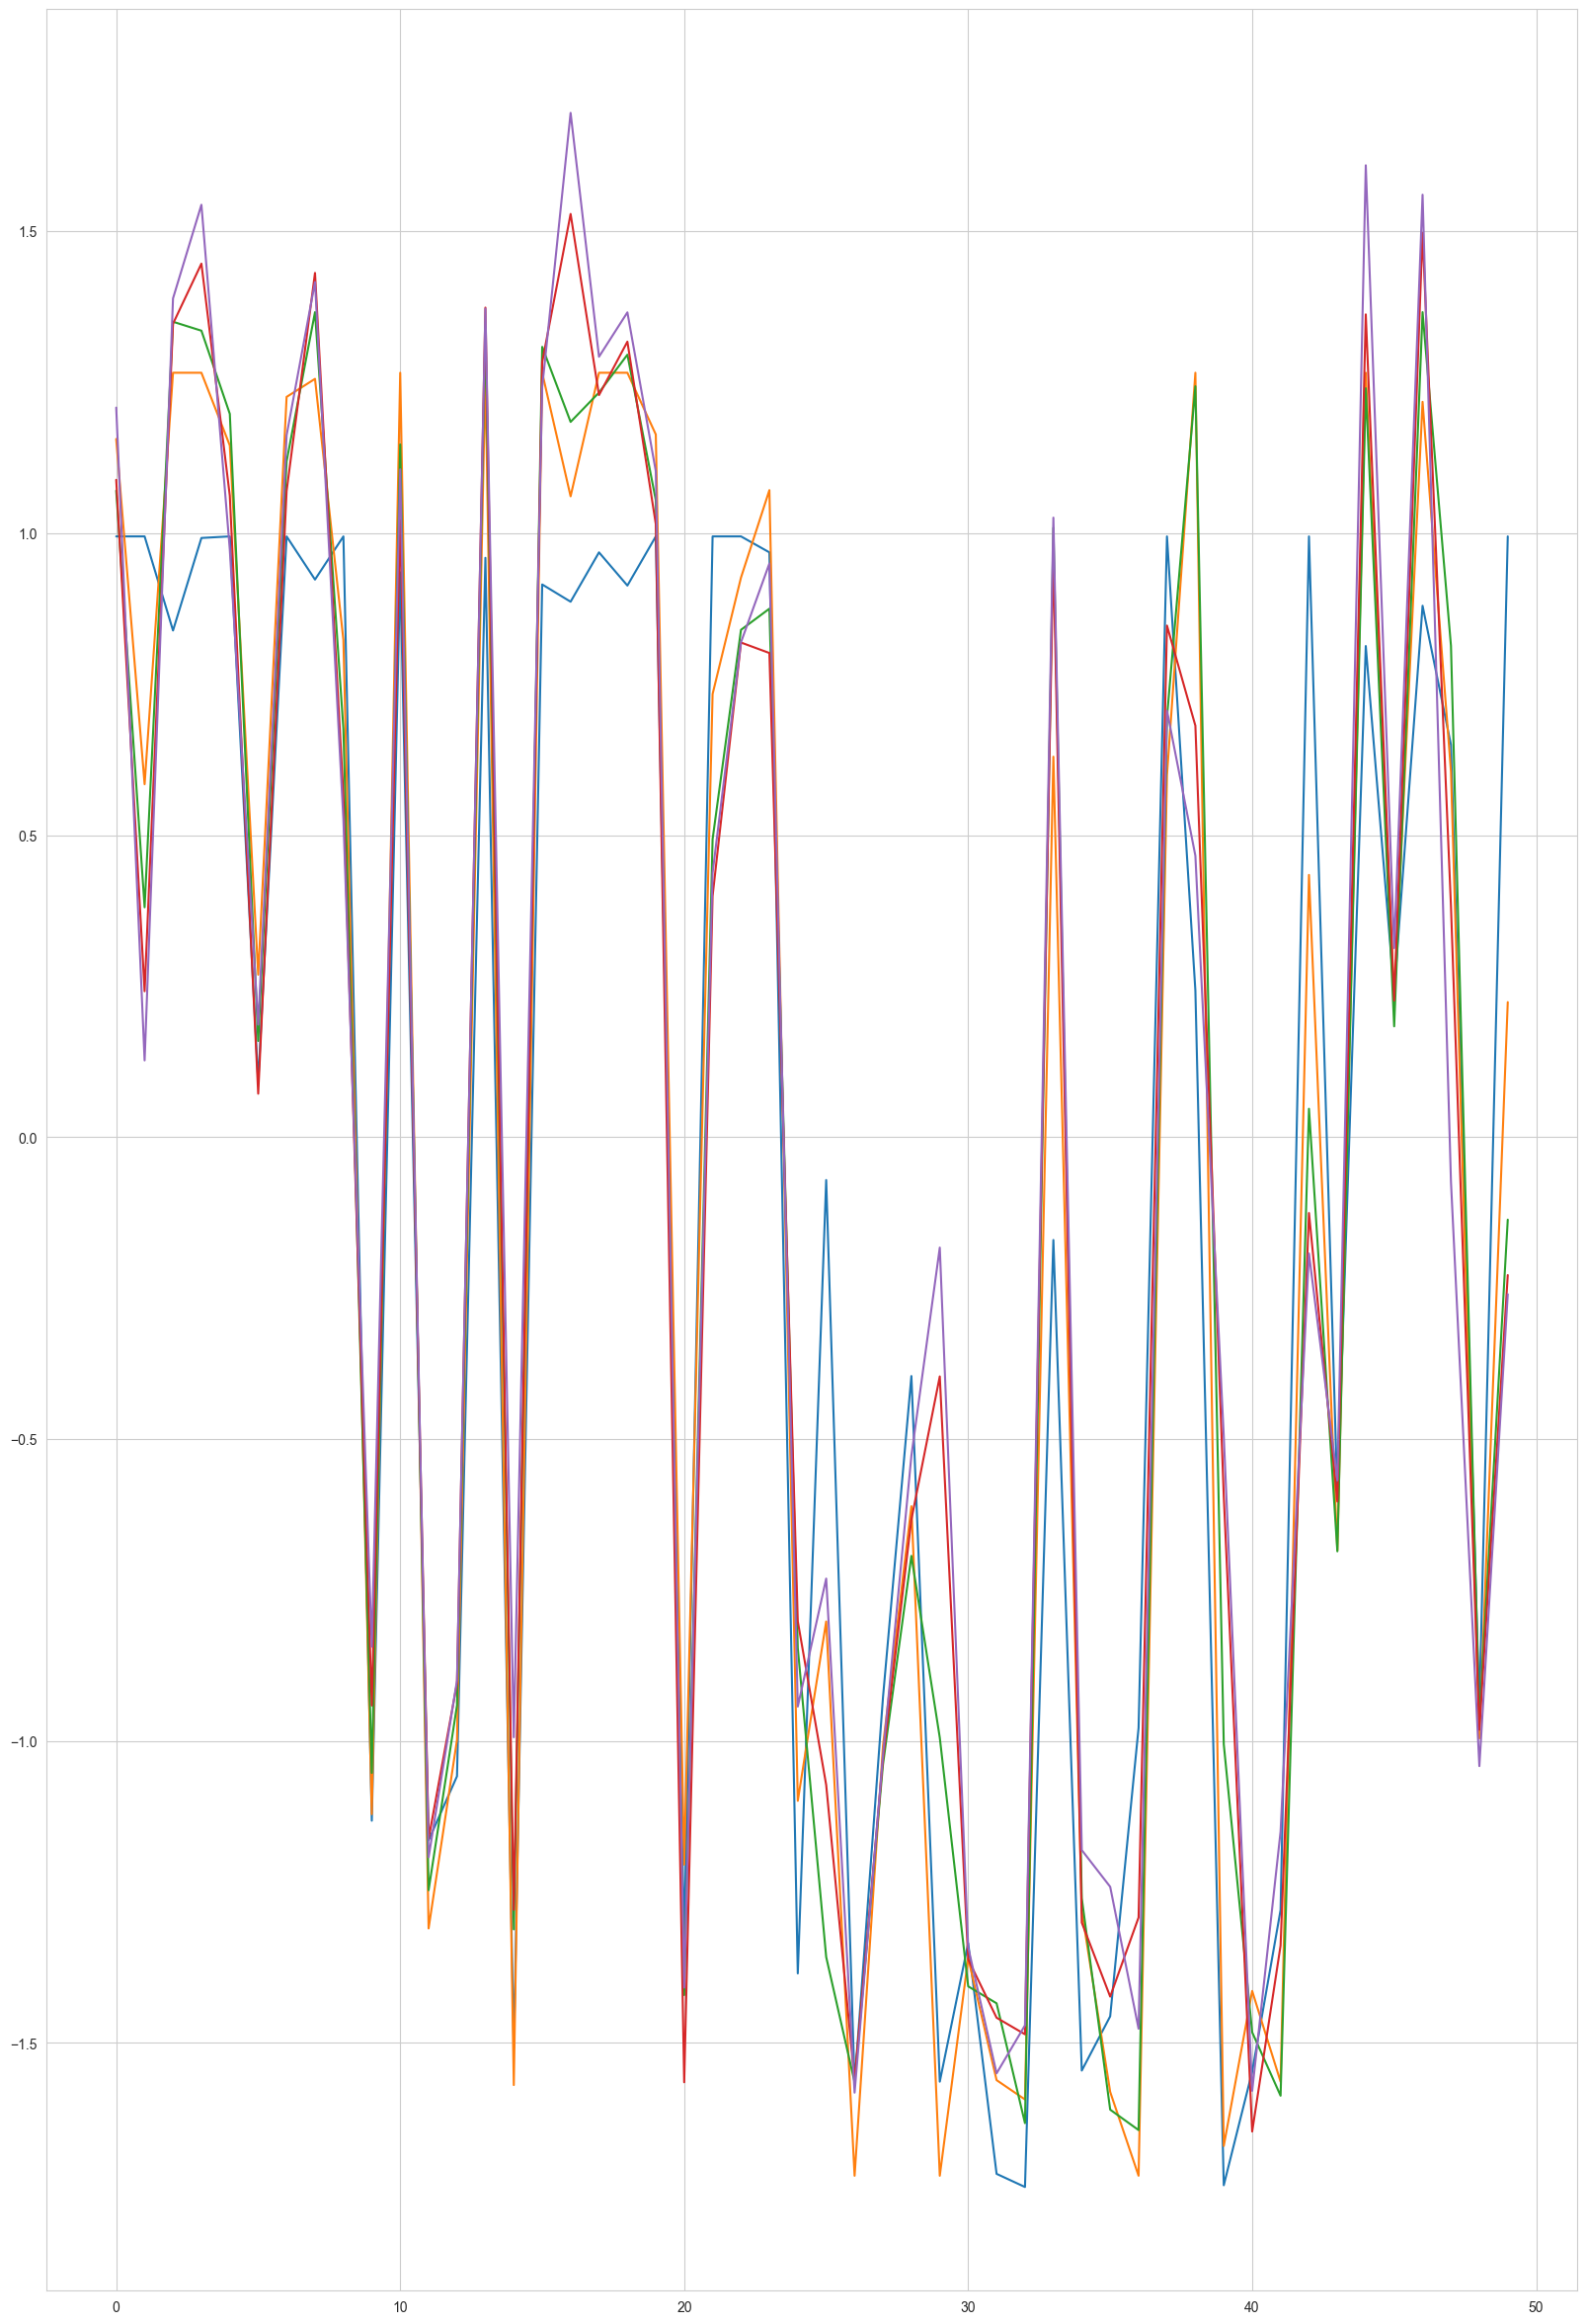

In [12]:
plt.figure(figsize=(20,30))
plt.plot(data_standardized.iloc[0:50, 0:5])
plt.show()

In [13]:
data_standardized.drop(columns='id', inplace=True)

In [14]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=30)
lle_transformed = lle.fit_transform(data_standardized)

In [15]:
lle_transformed

array([[ 0.01218057, -0.04342328,  0.04244253, ..., -0.02439758,
         0.01130321, -0.05134013],
       [ 0.06680336,  0.01978585,  0.0260008 , ..., -0.00440066,
        -0.0015232 ,  0.02301125],
       [ 0.01188021, -0.04654265,  0.04466694, ..., -0.03881794,
        -0.00283557, -0.02569583],
       ...,
       [ 0.02566204, -0.02849457,  0.04048085, ..., -0.01754448,
        -0.04227676, -0.04846554],
       [ 0.0297977 , -0.02076984,  0.03546054, ..., -0.01290616,
         0.01387953, -0.03023833],
       [ 0.01444688, -0.0406993 ,  0.04473208, ..., -0.07197827,
         0.05292412, -0.02716008]])

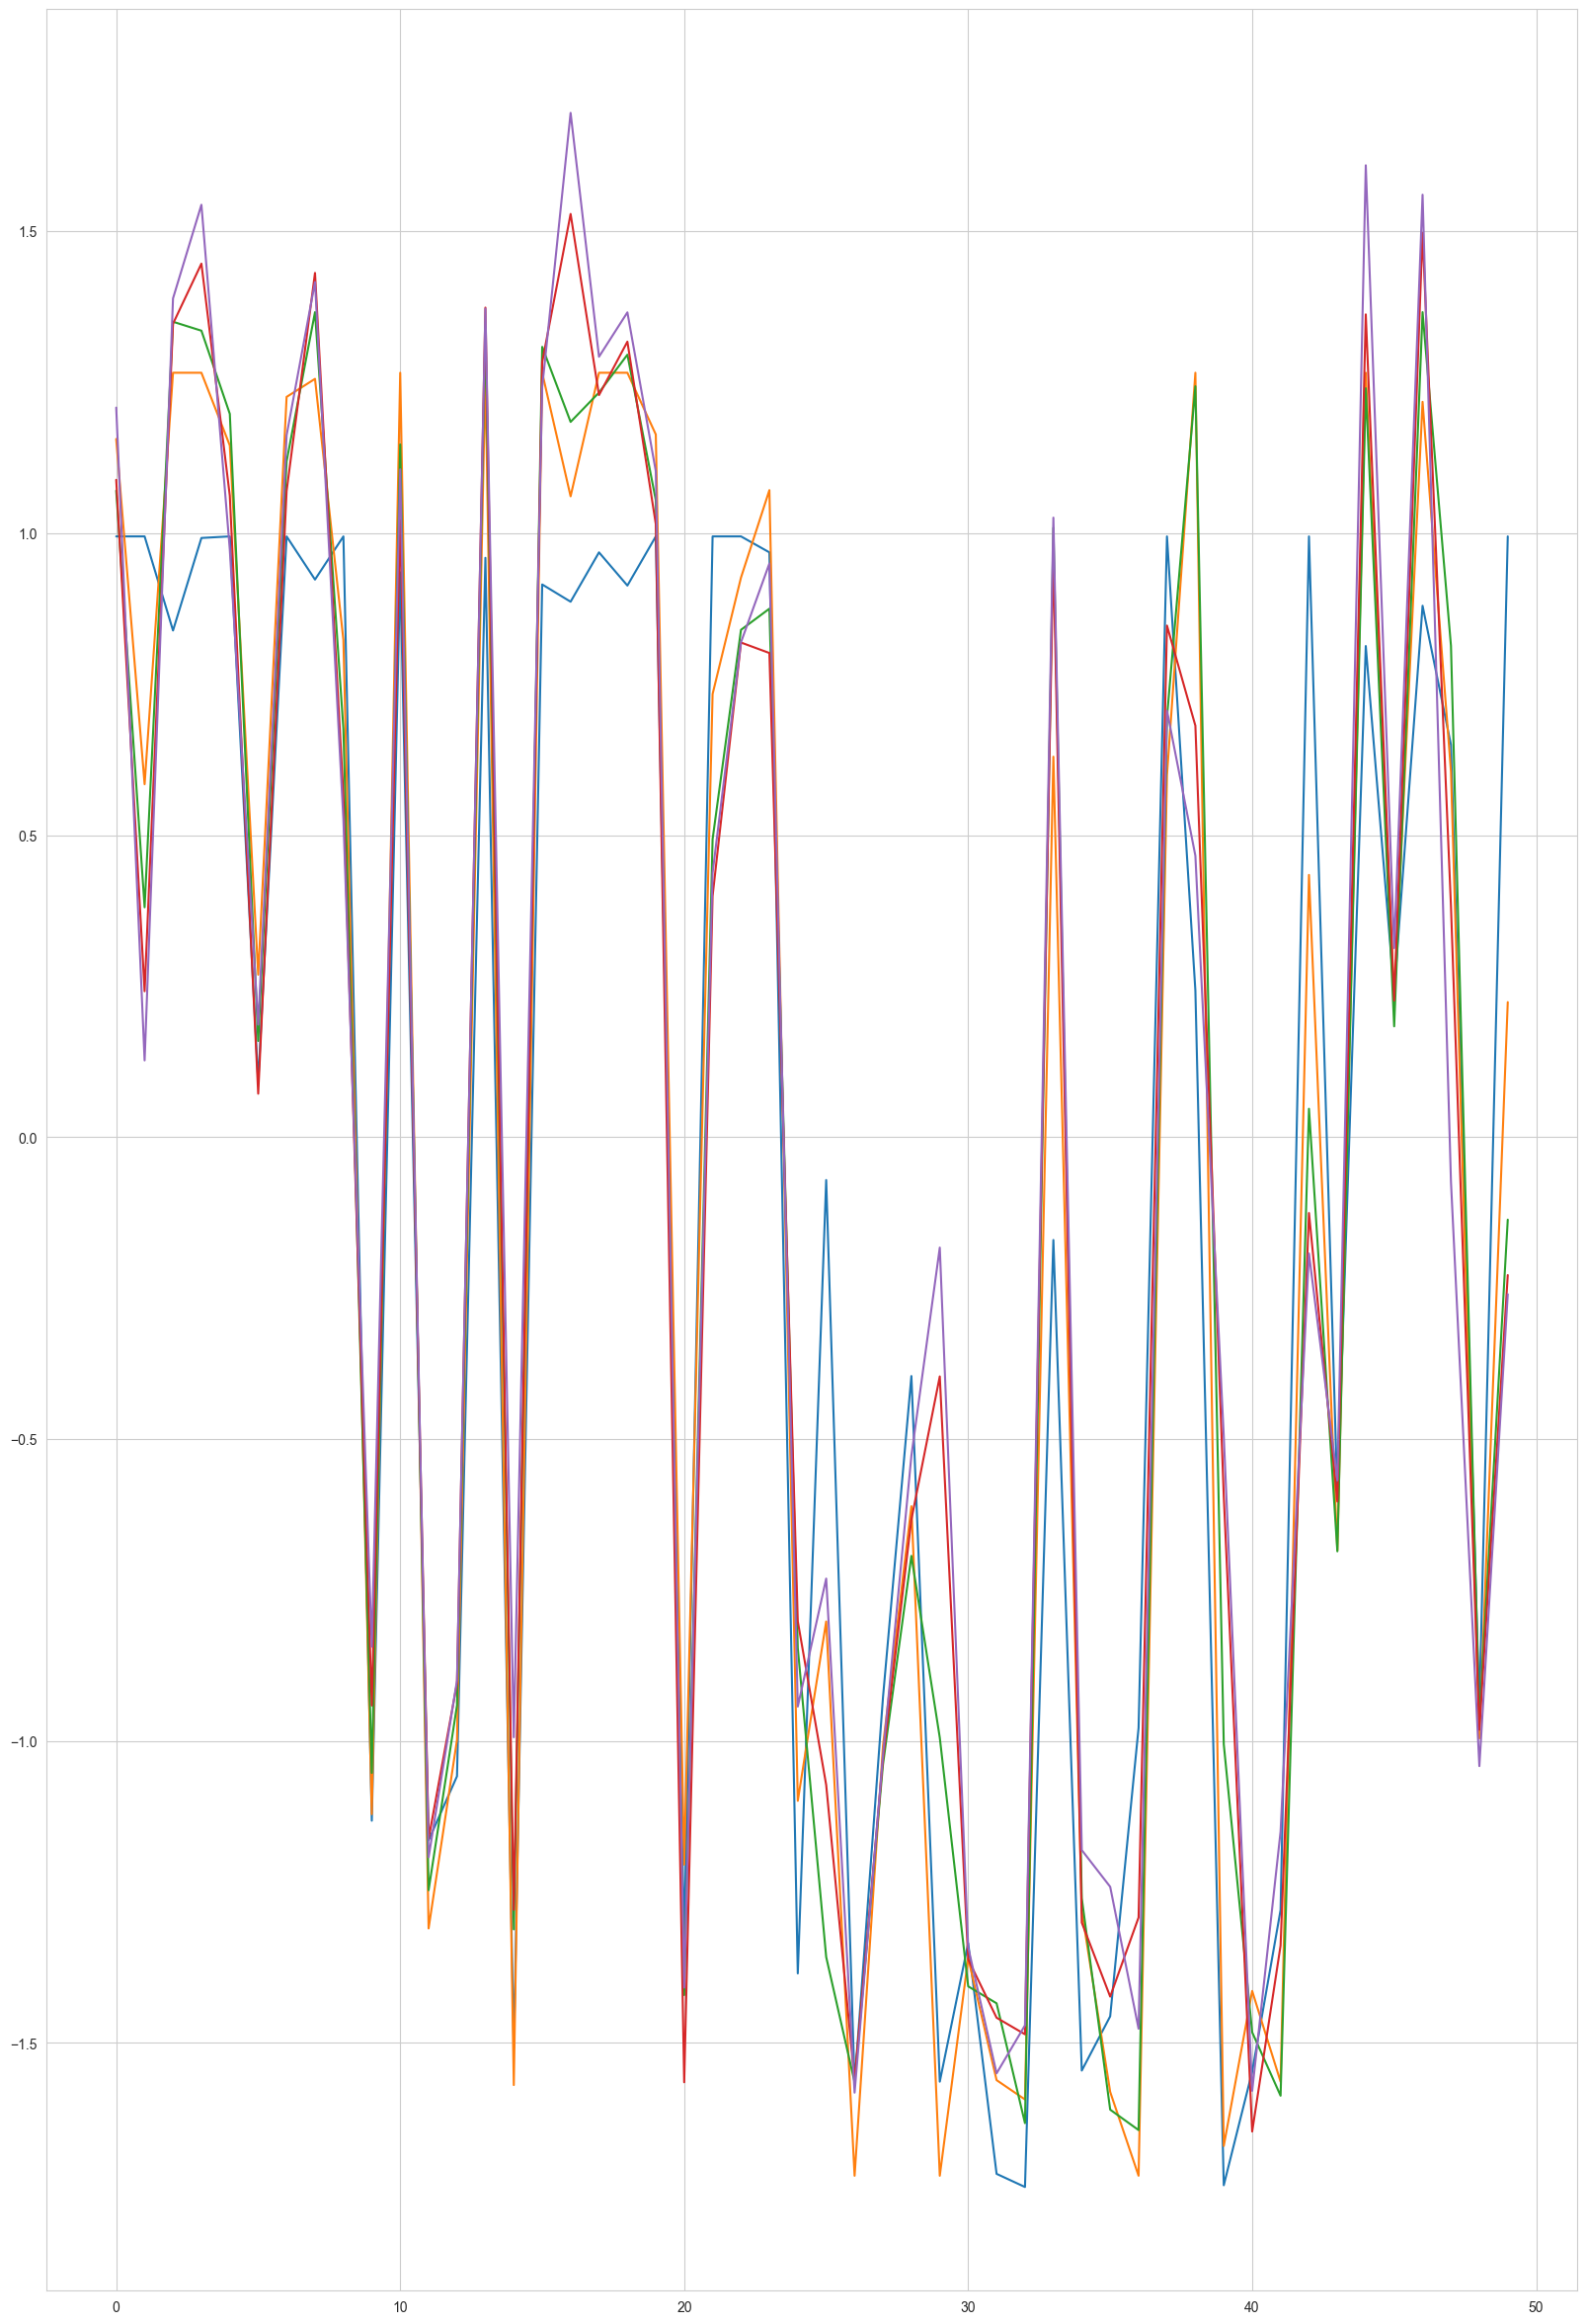

In [16]:
plt.figure(figsize=(20,30))
plt.plot(data_standardized.iloc[0:50, 0:5])
plt.show()

In [17]:
lle_transformed_data = pd.DataFrame(lle_transformed)

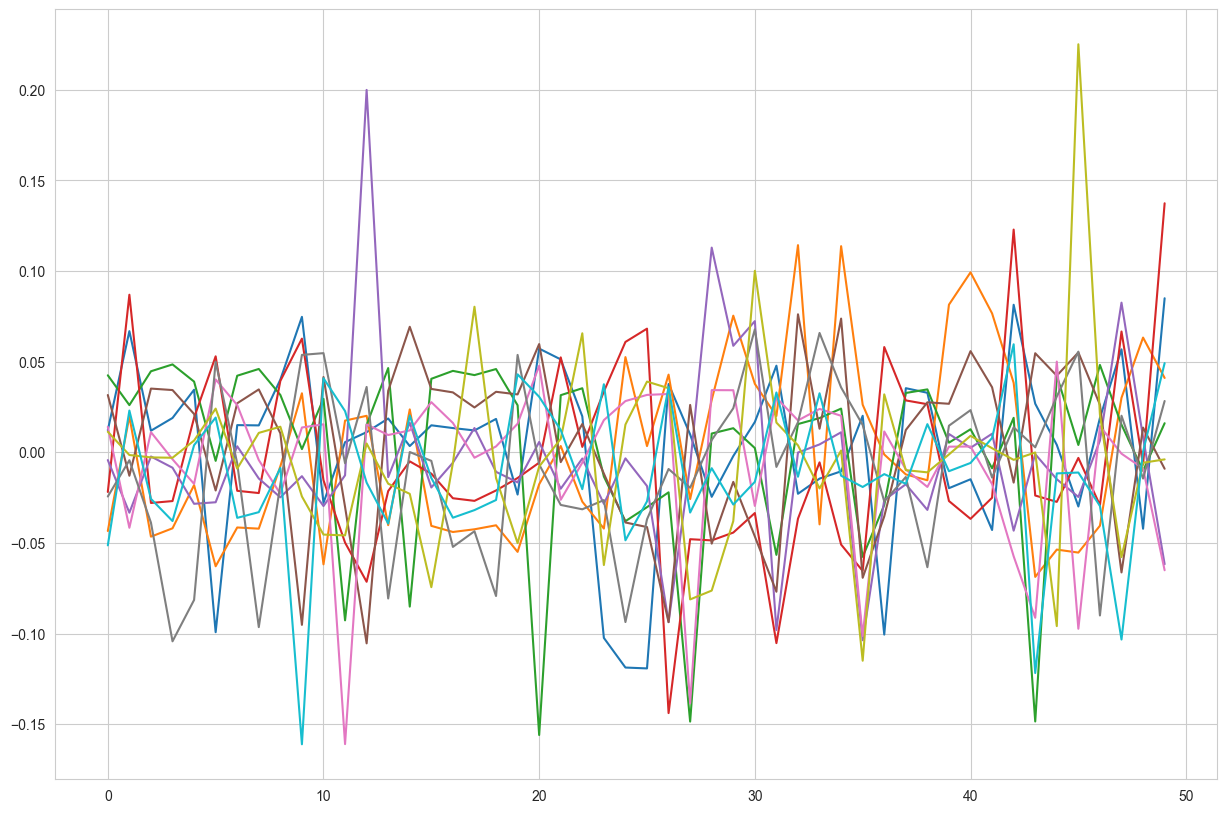

In [19]:
plt.figure(figsize=(15,10))
plt.plot(lle_transformed_data.iloc[0:50, 0:10])
plt.show()

In [38]:
lle_transformed.get_feature_names_out()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

In [29]:
for i in range(1,20):
  data = []
  lle = LocallyLinearEmbedding(n_components=i)
  features_reduced = lle.fit_transform(data)
  print(f"n = {i}")
  print(lle.explained_variance_ratio_.sum())
  data.append(lle.explained_variance_ratio_.sum())

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Unrecognized marker style array([ 0.02885001, -0.08301731,  0.03895838,  0.03504596, -0.01429696,
       -0.03153097,  0.03189931,  0.02869274, -0.03618186, -0.06673354,
        0.02763521,  0.00064126,  0.05104497,  0.0306053 , -0.00087928,
        0.02597387,  0.03307082,  0.0337615 ,  0.03176509,  0.02829268,
       -0.00899136, -0.04877263,  0.00113074, -0.02178339, -0.0439944 ,
       -0.04932204,  0.13531655, -0.01695461,  0.04328104,  0.01651361,
       -0.01360386,  0.09778503,  0.04012125,  0.0258055 ,  0.04858001,
        0.04100854, -0.0494907 , -0.02391033, -0.01630881,  0.01371785,
        0.03321914,  0.01508779, -0.11569955, -0.0524299 ,  0.0428562 ,
       -0.01233915,  0.03855715, -0.0701345 , -0.00174464, -0.13021878,
       -0.09574757, -0.00678139, -0.02379388,  0.02639239, -0.03808484,
        0.02114599,  0.031685  ,  0.03631846,  0.04415167, -0.00417444,
       -0.00105146,  0.02996076,  0.02455915,  0.02200805,  0.00761864,
        0.00548693,  0.03697675,  0.03815384,  0.03132359, -0.02444157,
       -0.04581582,  0.02998369,  0.04044733,  0.00651476,  0.03439449,
        0.05850485,  0.0359326 ,  0.03564139,  0.02573351,  0.0372871 ,
        0.0254566 ,  0.03055585, -0.04751357, -0.01996811,  0.03050892,
       -0.04481497, -0.05603326,  0.00636944, -0.03530597,  0.05530327,
        0.03580718,  0.04043122,  0.01055928, -0.06945608,  0.04714152,
       -0.06522217,  0.01578157, -0.06754311,  0.02064973, -0.03441816,
        0.03171154, -0.02744155, -0.06802748, -0.09197826,  0.02612152,
        0.08361736, -0.03145016,  0.01007281, -0.02365999,  0.03567844,
       -0.10581003, -0.05345628, -0.01135737, -0.00992993,  0.044892  ,
        0.02828293,  0.01264793,  0.09703283,  0.0288795 , -0.05504644,
       -0.00567487, -0.00360125,  0.09415984,  0.03096619,  0.0535476 ,
        0.03728265,  0.00928621, -0.05092654,  0.0436212 ,  0.04643487,
        0.09186104, -0.01189035, -0.00977732,  0.07368449,  0.1180221 ,
       -0.03644939,  0.05227645,  0.03163647,  0.03137764, -0.02621057,
        0.06518774,  0.06227504, -0.02020533,  0.02729222, -0.08959247,
        0.0229569 ,  0.018425  , -0.02416028,  0.03850105, -0.01297835,
       -0.00825909, -0.0249232 ,  0.02696925, -0.03169431,  0.00377199,
       -0.04824806,  0.11276864,  0.01440358,  0.00297782,  0.01661696,
       -0.00264791,  0.02544591, -0.02993122,  0.03575369, -0.00582737,
        0.0222686 ,  0.0047621 , -0.07570411, -0.01028872,  0.06135929,
        0.02358181, -0.03075   , -0.03962505,  0.02312642,  0.10266574,
        0.0636539 ,  0.02215901,  0.01958363, -0.0678199 ,  0.03035214,
        0.10671137,  0.0262643 , -0.07129478,  0.11946356, -0.02436767,
        0.01119468, -0.01750706,  0.02177208, -0.02531941,  0.02188207,
       -0.09966321, -0.00762113, -0.00894492, -0.11062537, -0.05525042,
       -0.02248872,  0.05635633,  0.03266449,  0.10617388,  0.03384996,
       -0.06288825,  0.04323495, -0.07131293, -0.01033424, -0.10489207,
        0.02799726, -0.00094378,  0.00934336, -0.09724206, -0.04163866,
        0.03995582,  0.02124099,  0.00619223,  0.04144831,  0.00959565,
        0.10843642,  0.01282553,  0.01275473,  0.03141306, -0.01734325,
        0.01881582, -0.0098404 , -0.06369514,  0.09796286,  0.02723126,
       -0.03076234,  0.00812924, -0.03562954, -0.00577722,  0.02402229,
       -0.04041444,  0.04052446,  0.01424578, -0.07571414, -0.04335227,
       -0.03584117,  0.02094367, -0.01612241, -0.03169413,  0.01240893,
       -0.04318792, -0.06336608, -0.00580499,  0.03077744,  0.01498682,
        0.02497851, -0.02821155, -0.01569349,  0.02328211,  0.0658482 ,
       -0.0642728 ,  0.07276637, -0.05250234,  0.07649791, -0.04811052,
       -0.08388609, -0.08444301, -0.08074906, -0.02525415, -0.12754468,
        0.0138318 ,  0.0516681 , -0.09528609,  0.02149234,  0.02516459,
        0.02660073,  0.01596417, -0.11562805, -0.0075407 ,  0.02111002,
       -0.06653011, -0.05301352,  0.01354537,  0.01798303, -0.02812487,
        0.02726069, -0.03293042, -0.03827902,  0.04190828, -0.05304662,
       -0.05445855, -0.0891409 ,  0.01449388,  0.0213633 ,  0.02324144,
       -0.0936718 ,  0.10946634,  0.02120159, -0.10568631, -0.06644419,
        0.05399174,  0.01745623,  0.01946778, -0.04224169,  0.03937716,
       -0.0846636 ,  0.03939887,  0.03035512,  0.02927125,  0.0467439 ,
       -0.00924089,  0.03412987,  0.03160386, -0.0378954 , -0.07018132,
       -0.02666095, -0.07484487, -0.04572581, -0.0617627 ,  0.02052368,
       -0.00127859, -0.06409527,  0.02910427, -0.03857801,  0.02659236,
        0.02522477,  0.0350571 , -0.01024616,  0.02370691,  0.01426004,
       -0.08126041,  0.02622347, -0.00382463, -0.06019271,  0.04924945,
        0.09064901, -0.01064866, -0.01492487, -0.01781579,  0.01317877,
       -0.06885222,  0.00303921, -0.03284408,  0.03868832,  0.01331807,
        0.02936101, -0.06197831,  0.03767634, -0.02258278,  0.02179557,
        0.01707516, -0.01190459,  0.03201865,  0.03106871, -0.02195667,
       -0.02999898, -0.00679214, -0.05859324,  0.11456274, -0.03665941,
        0.00556449,  0.11297045,  0.00568768, -0.05279852, -0.00092095,
        0.0054459 ,  0.03841587,  0.00250219,  0.0236865 , -0.03459813,
       -0.08726319,  0.03281838,  0.0188429 , -0.03444157,  0.00912987,
       -0.06894337,  0.09267692,  0.03614052, -0.04402226,  0.00842022,
        0.06783209,  0.02144596,  0.00153502,  0.0207458 ,  0.01887558,
        0.03058208,  0.0312588 ,  0.0793619 ,  0.07760912,  0.00802365,
       -0.10557991, -0.09825711, -0.07590053,  0.02987763, -0.09690646,
        0.03590734, -0.06344449,  0.03838091, -0.06705174, -0.01213076,
        0.00287406,  0.03047591, -0.09538702,  0.00286686,  0.11537009,
       -0.01310963,  0.0068652 ,  0.00753002, -0.07064553, -0.11839945,
       -0.05808005,  0.02845083,  0.02455616,  0.02278545, -0.01365321,
        0.03680743,  0.02508233,  0.03790046, -0.06844094,  0.01764195,
       -0.05459187, -0.00593692, -0.0393947 ,  0.01419809,  0.03455814,
        0.00606725,  0.01456415, -0.05674795, -0.0648812 , -0.03824896,
        0.01188183, -0.01297954,  0.02935097])

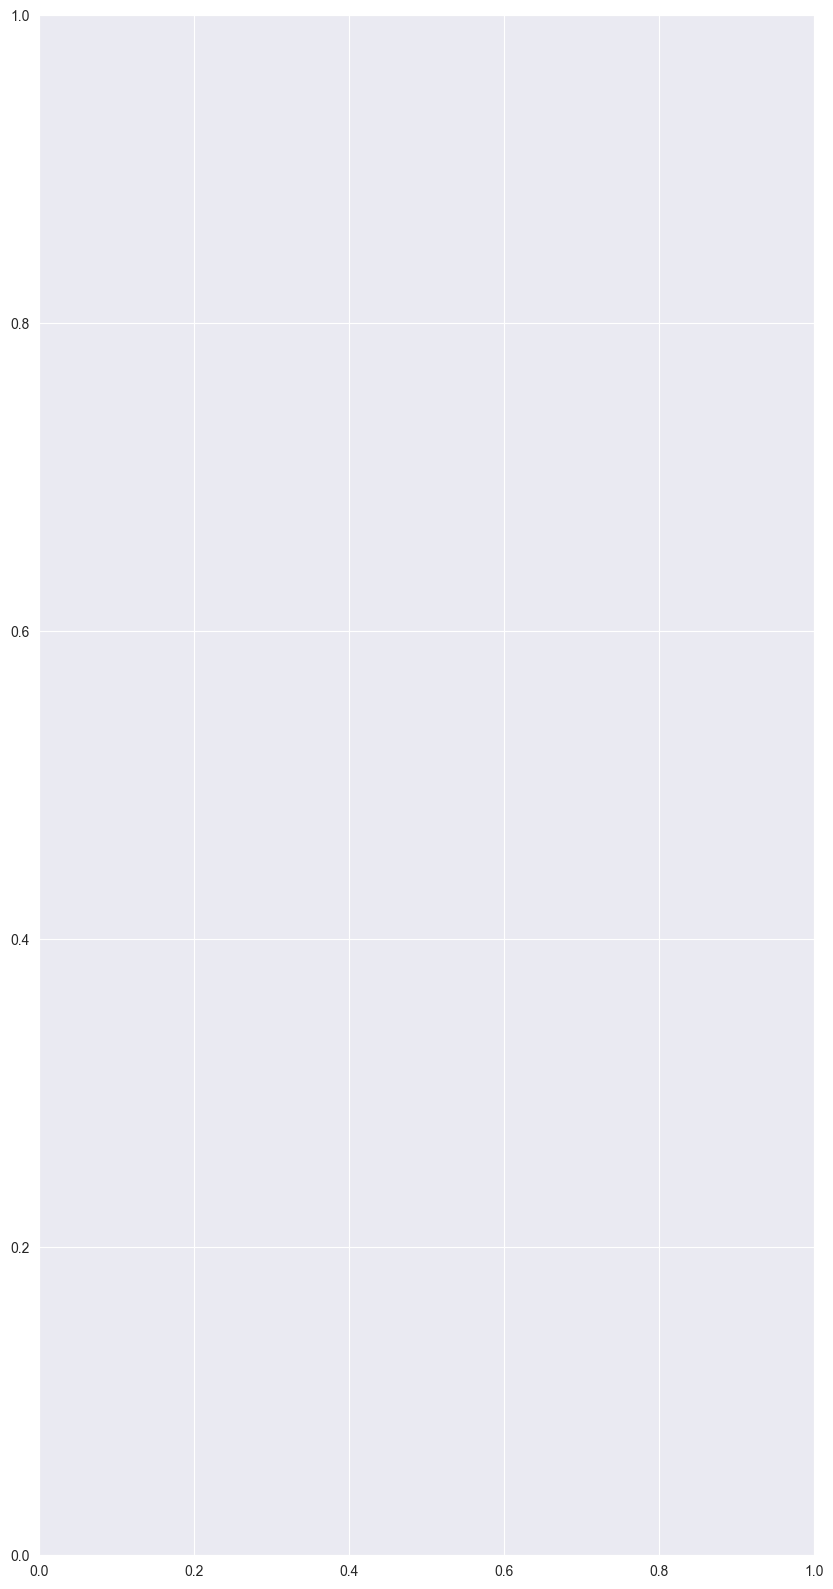

In [17]:
# Plot the graph
figure  = plt.figure(figsize=(10,20))
plt.scatter( lle_transformed[:, 0], lle_transformed[:, 1], lle_transformed[:, 2], lle_transformed[:, 3], lle_transformed[:, 4], lle_transformed[:, 5], lle_transformed[:, 6], lle_transformed[:, 7], lle_transformed[:, 8], lle_transformed[:, 9])#, s=300)
plt.title('LLE graph of astronomy data')
plt.show()